In [13]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager


In [529]:
driver = webdriver.Chrome(ChromeDriverManager().install())

[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 89.0.4389
[WDM] - Get LATEST driver version for 89.0.4389
[WDM] - Driver [C:\Users\DELL\.wdm\drivers\chromedriver\win32\89.0.4389.23\chromedriver.exe] found in cache


In [308]:
# importing important libraries

import argparse
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
from selenium.common.exceptions import ElementNotInteractableException
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import StaleElementReferenceException
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.support.select import Select

In [530]:
# Opening the url 
driver.get('https://www.instagram.com/')
wait = WebDriverWait(driver, 10)
element = wait.until(EC.presence_of_element_located((By.XPATH,'//*[@id="loginForm"]/div/div[1]/div/label/input')))

# Defining a function to login instagram.......

def login(us,ps):
    # filling the username and password text box......
    u = driver.find_element_by_xpath('//*[@id="loginForm"]/div/div[1]/div/label/input')
    u.send_keys(us)
    p = driver.find_element_by_xpath('//*[@id="loginForm"]/div/div[2]/div/label/input')
    p.send_keys(ps)
    login = driver.find_element_by_xpath('//*[@id="loginForm"]/div/div[3]').click()
    # save info box appears clicking on not now option
    try:
        wait = WebDriverWait(driver, 10)
        element = wait.until(EC.presence_of_element_located((By.XPATH,'//*[@id="react-root"]/section/main/div/div/div/div/button')))
        not_now = driver.find_element_by_xpath('//*[@id="react-root"]/section/main/div/div/div/div/button')
        not_now.click()
    except NoSuchElementException:
        pass
    # waiting for turn off dialog box ..sometimes appear otherwise passing the error...
    try:
        wait = WebDriverWait(driver, 10)
        element = wait.until(EC.presence_of_element_located((By.XPATH, '/html/body/div[4]/div/div/div/div[3]/button[2]')))
    except TimeoutException:
        pass
        # turn off dilaog box if appears clicking on turn off
    try:
        driver.find_element_by_xpath('/html/body/div[4]/div/div/div/div[3]/button[2]').click()
    except NoSuchElementException:
        pass
login('sample username','sample password')

# 1.1) From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10 handles and find the top 5 which have the highest number of followers

In [357]:
# defining a function for searching in search bar.......
def search_handle(handle):
    search_bar = driver.find_element_by_xpath('//*[@id="react-root"]/section/nav/div[2]/div/div/div[2]/input').send_keys(handle)
    wait = WebDriverWait(driver, 10)
    element = wait.until(EC.presence_of_element_located((By.XPATH,'//*[@id="react-root"]/section/nav/div[2]/div/div/div[2]/div[3]/div/div[2]/div')))
search_handle('food')

In [358]:
# after searching maintaining a dictionary key as handle name and value as insta handle link removing "#" of top 10
name_link = {}
def insta_handles(handle):
    search_handle(handle)
    name = driver.find_elements_by_class_name('-qQT3')
    #name.get_attribute('innerHTML')
    for i in range(10):
        s = name[i].get_attribute('href').split('/')[3]
        link = name[i].get_attribute('href')
        if s!='explore':
            name_link[s] = link
insta_handles('food')
for i in name_link:
    print(i,name_link[i])

yourfoodlab https://www.instagram.com/yourfoodlab/
delhi_street_food1 https://www.instagram.com/delhi_street_food1/
chubby_foodie06 https://www.instagram.com/chubby_foodie06/
tale_of_yum_food https://www.instagram.com/tale_of_yum_food/
gorakhpurfoods https://www.instagram.com/gorakhpurfoods/
foodrush.recipe https://www.instagram.com/foodrush.recipe/
food https://www.instagram.com/food/
the_foodie_allahabadi https://www.instagram.com/the_foodie_allahabadi/
foodsoflucknow https://www.instagram.com/foodsoflucknow/
foodies_on_streets https://www.instagram.com/foodies_on_streets/


In [359]:
# maintianing a dictionary of insta handles and their followers throuhg using links that we have in above dictionary.........
name_foll_no = {}
for i in name_link:
    driver.get(name_link[i])
    time.sleep(1)
    f = driver.find_element_by_xpath('//*[@id="react-root"]/section/main/div/header/section/ul/li[2]/a/span')
    time.sleep(1)
    name_foll_no[i] = f.get_attribute('title')
    driver.back()
    time.sleep(1)
name_foll_no_sorted = {}
name_link_sorted = {}


In [360]:
# no of followers are in string form
name_foll_no

{'yourfoodlab': '1,592,114',
 'delhi_street_food1': '22,149',
 'chubby_foodie06': '6,035',
 'tale_of_yum_food': '101',
 'gorakhpurfoods': '12,688',
 'foodrush.recipe': '606,125',
 'food': '113,840',
 'the_foodie_allahabadi': '6,998',
 'foodsoflucknow': '162',
 'foodies_on_streets': '792'}

In [361]:
# maintaing two separate lists of followers and users........
users = []
followers = []
for i in name_foll_no:
    users.append(i)
    followers.append(name_foll_no[i])
    

In [362]:
users

['yourfoodlab',
 'delhi_street_food1',
 'chubby_foodie06',
 'tale_of_yum_food',
 'gorakhpurfoods',
 'foodrush.recipe',
 'food',
 'the_foodie_allahabadi',
 'foodsoflucknow',
 'foodies_on_streets']

In [363]:
followers

['1,592,114',
 '22,149',
 '6,035',
 '101',
 '12,688',
 '606,125',
 '113,840',
 '6,998',
 '162',
 '792']

In [364]:
# now converting the string format of followers into integer value.......
for i in range(len(followers)):
    if not 'k' in followers[i]:
        followers[i]=int("".join(followers[i].split(',')))
    else:
        followers[i]=float(followers[i][:-1])*1000
followers=np.array(followers, dtype='int')
users=np.array(users)

#sorted 

users=users[np.argsort(followers)][::-1]
followers=followers[np.argsort(followers)][::-1]

# now printing top 5  insta gandles with their Number of followers..

top5=[] #list of top5 insta handle
name_foll_no_sorted = {} #dictionary of top5 insta-handle as key and their no of followers as value ,sorted in desc order of values
name_link_sorted ={} # dictionary of top5 insta-handle as key and their links as value
for x in range(5):
    print(users[x],followers[x])
    key = users[x]
    value = followers[x]
    name_foll_no_sorted[key] = value
    top5.append(users[x])


yourfoodlab 1592114
foodrush.recipe 606125
food 113840
delhi_street_food1 22149
gorakhpurfoods 12688


In [365]:
# Printing top5 insta handles and their number of followers on the basis of search of top 10 insta handles followers......

for i in name_foll_no_sorted:
    name_link_sorted[i] = name_link[i]
    print(i,name_foll_no_sorted[i])

yourfoodlab 1592114
foodrush.recipe 606125
food 113840
delhi_street_food1 22149
gorakhpurfoods 12688


In [366]:
# # Printing top5 insta handles and their links.........

for i in name_link_sorted:
    print(i,name_link_sorted[i])

yourfoodlab https://www.instagram.com/yourfoodlab/
foodrush.recipe https://www.instagram.com/foodrush.recipe/
food https://www.instagram.com/food/
delhi_street_food1 https://www.instagram.com/delhi_street_food1/
gorakhpurfoods https://www.instagram.com/gorakhpurfoods/


# 1.2) Now Find the number of posts these handles have done in the previous 3 days.

In [553]:
# maintaing a dictionary of top5 handles and their post time..............

time_post = {}
import time
for i in name_link_sorted:
    key = i
    value = []
    driver.get(name_link_sorted[i])
    posts_list = driver.find_elements_by_xpath('//div[@class="v1Nh3 kIKUG  _bz0w"]/a')
    for i in range(10):
        posts_list[i].click()
        time.sleep(2)
        try:
            time1 = driver.find_element_by_xpath('/html/body/div[5]/div[2]/div/article/div[3]/div[2]/a/time')
            t = time1.get_attribute('innerHTML')
            #print(t)
            value.append(t)     
        except (NoSuchElementException, ElementNotInteractableException):
            pass 
        close_button = driver.find_element_by_xpath('/html/body/div[5]/div[3]/button')
        close_button.click()
    time_post[key] = value
    time.sleep(2)
    driver.back()

In [577]:
# here maintaing a dictionary of insta handles and their no of post in last 3 days.........

tp ={}
no_of_posts = []
for i in time_post:
    c = 0
    for j in time_post[i]:
        if 'h' in j:
            c = c+1
        elif '1 day' in j:
            c = c+1
        elif '2 days' in  j:
            c = c+1
        elif '3 days' in  j:
            c = c+1
    no_of_posts.append(c)
    tp[i] = c
tp

{'yourfoodlab': 10,
 'foodrush.recipe': 0,
 'food': 7,
 'delhi_street_food1': 14,
 'gorakhpurfoods': 5}

# 1.3) Depict this information using a suitable graph.

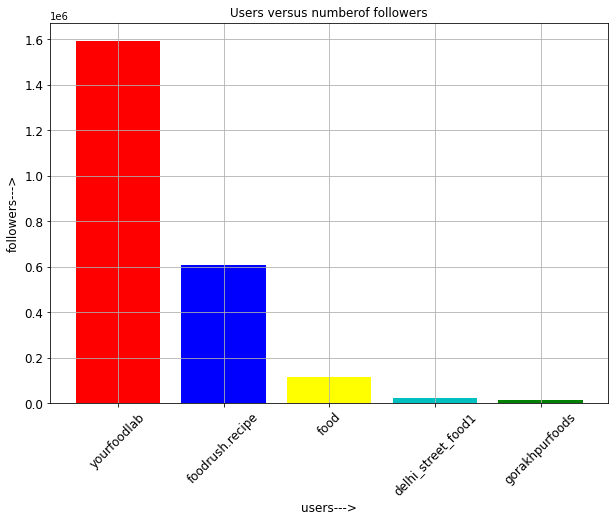

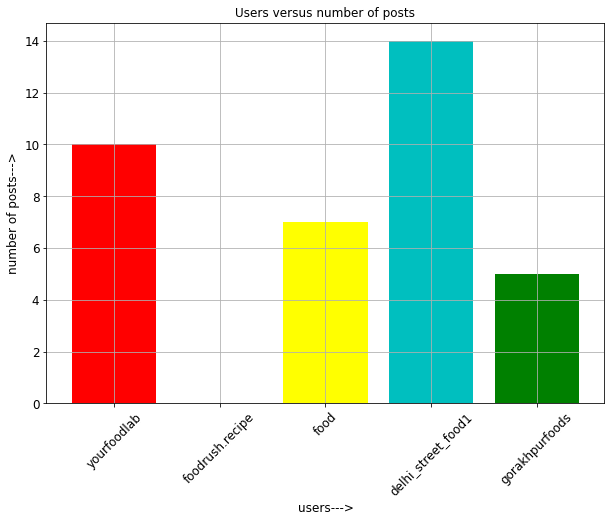

In [574]:
# Plottint the bar graphs Users versus number of followers.....

colors = ['red','blue','yellow','c','green']
plt.figure(figsize=(10, 7))
plt.bar(users[:5], followers[:5], color=colors)
plt.xticks(rotation=45, size=12)
plt.yticks(size=12)
plt.title('Users versus numberof followers', size=12)
plt.xlabel('users--->', size=12)
plt.ylabel('followers--->', size=12)
plt.grid()
plt.show()

# Plottint the bar graphs Users versus number of posts.........

plt.figure(figsize=(10, 7))
plt.bar(top5, no_of_posts, color=colors)
plt.xticks(rotation=45, size=12)
plt.yticks(size=12)
plt.title('Users versus number of posts', size=12)
plt.xlabel('users--->', size=12)
plt.ylabel('number of posts--->', size=12)
plt.grid()
plt.show()

# 2.1) Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.

In [410]:
contents = []
for i in name_link_sorted:
    driver.get(name_link_sorted[i])
    posts_list = driver.find_elements_by_xpath('//div[@class="v1Nh3 kIKUG  _bz0w"]/a')
    for i in range(10):
        posts_list[i].click()
        time.sleep(2)
        try:
            con = driver.find_element_by_xpath('/html/body/div[5]/div[2]/div/article/div[3]/div[1]/ul/div/li/div/div/div[2]/span')
            contents.append(con.get_attribute('textContent'))
        except (NoSuchElementException, ElementNotInteractableException):
            pass 
        close_button = driver.find_element_by_xpath('/html/body/div[5]/div[3]/button')
        close_button.click()
    time.sleep(2)
    driver.back()
#posts_list[0].get_attribute('outerHTML')

In [448]:
top5

['yourfoodlab',
 'foodrush.recipe',
 'food',
 'delhi_street_food1',
 'gorakhpurfoods']

In [524]:
c = 0
for i in name_link_sorted:
    print('Contents of first 10 posts of isnta-handle--',i)
    print('****************************************************************')
    for i in range(10):
        try:
            print(contents[c])
            c=c+1
        except IndexError:
            pass
        print('---------------------------------------------------')

Contents of first 10 posts of isnta-handle-- yourfoodlab
****************************************************************
Nagpur special Tari Poha Recipe by Chef @sanjyotkeerSo a few days back I was in Nagpur and I was waiting to try this from a long time and I finally did. I had received a lot of requests to make a recipe video for the Tari poha and here it is. I have tried to prep it as close as possible to the one I had in Nagpur and the results were amazing. Do try the recipe and let me know! Cheers! ❤️....#recipes #recipeoftheday #foodporn #foodphotography #sanjyotkeer #YourFoodLab #StreetFood
---------------------------------------------------
New video is up on the YouTube & Facebook channel! NYC cart style chicken & rice! For the ones who haven’t tried it and don’t know about it, it practically is a chicken shawarma rice which tastes mind blowing. Shawarma style chicken is loaded over saffron flavored rice and is served with a delicious garlic white sauce and a hot sauce for wh

@cy_eats is keeping warm with this Steamy Seafood Lovers Bucatini 💕 From the well-heated outdoor veranda at @jamesctracey’s @isabellesnyc! #nyc #nycfood #nycfoodie #seafood #bucatini #pasta #yum #food #eat
---------------------------------------------------
Tag your squad you’d like to take on this @lartusi feast with 🤤#nyc #nycfood #nycfoodie #lartusi #food #yum #feast #dinner #eat
---------------------------------------------------
@lilianewyork Mafaldini prep #ChoosePasta #pasta #lilia #mafaldini #freshpasta #nyc #nycfood #nycfoodie #food
---------------------------------------------------
Incredible wagyu and more from @gan_hoo_bbq⁠⁠⁠⁠⁠⁠📸: @fionaeats365⁠⁠⁠⁠#wagyu #wagyubeef #tofu #ganhoobbq #nyc #nycfood #nycfoodie #yum #food
---------------------------------------------------
Wise 🥟 words from @nycfoodblog below 👇🏽⁠⁠“Last year I posted my top 3 dumpling spots in NYC, this is the only one left that’s still open (Kai Feng Fu Dumpling House located in Sunset Park, Brooklyn). The othe

# 2.2) Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.

In [414]:
hastags = []
import time
for i in name_link_sorted:
    driver.get(name_link_sorted[i])
    time.sleep(4)
    post  = driver.find_elements_by_xpath('//div[@class="v1Nh3 kIKUG  _bz0w"]/a')
    post.click()
    time.sleep(4)
    for i in range(10):
        try:
            has = driver.find_element_by_xpath('/html/body/div[5]/div[2]/div/article/div[3]/div[1]/ul/div/li/div/div/div[2]/span/a')
            hastags.append(has.get_attribute('innerHTML'))
        except NoSuchElementException:
            pass
        #time.sleep()
        next_button = driver.find_element_by_link_text("Next")
        next_button.click()
        time.sleep(2)
    driver.back()
    close = driver.find_element_by_xpath('//div[contains(@class , "_2dDPU")]/div[3]/button')
    close.click()
driver.get('https://www.instagram.com/')

In [441]:
hastags1 = []
import time
for i in name_link_sorted:
    driver.get(name_link_sorted[i])
    posts_list = driver.find_elements_by_xpath('//div[@class="v1Nh3 kIKUG  _bz0w"]/a')
    for i in range(10):
        posts_list[i].click()
        time.sleep(2)
        try:
            has1 = driver.find_elements_by_class_name('xil3i')
            for w in has1:
                hastags1.append(w.get_attribute('innerHTML'))
        except NoSuchElementException:
            pass
        #time.sleep()
        close_button = driver.find_element_by_xpath('/html/body/div[5]/div[3]/button')
        close_button.click()
        time.sleep(2)
    driver.back()
    #close = driver.find_element_by_xpath('//div[contains(@class , "_2dDPU")]/div[3]/button')
    #close.click()
driver.get('https://www.instagram.com/')

In [442]:
hastags1

['#recipes',
 '#recipeoftheday',
 '#foodporn',
 '#foodphotography',
 '#sanjyotkeer',
 '#YourFoodLab',
 '#StreetFood',
 '#recipes',
 '#recipeoftheday',
 '#falafel',
 '#falafelrecipe',
 '#falafelwrap',
 '#falafelbowl',
 '#falafels',
 '#hummus',
 '#hummusrecipe',
 '#hummuslover',
 '#foodporn',
 '#foodphotography',
 '#sanjyotkeer',
 '#mumbaiblogger',
 '#recipes',
 '#recipeoftheday',
 '#foodporn',
 '#foodphotography',
 '#sanjyotkeer',
 '#YourFoodLab',
 '#StreetFood',
 '#typicallnagpuri',
 '#recipeoftheday',
 '#maggi',
 '#maggilover',
 '#indiancuisine',
 '#streetfood',
 '#yummyfood',
 '#foodporn',
 '#foodstagram',
 '#streetfoodindia',
 '#sanjyotkeer',
 '#recipeoftheday',
 '#rice',
 '#ricebowl',
 '#ricelover',
 '#foodphotography',
 '#periperi',
 '#foodporn',
 '#streetfoodindia',
 '#streetfoodlover',
 '#indiancuisine',
 '#sanjyotkeer',
 '#welcome',
 '#welcome',
 '#HarTastyCheezMeinGoCheese',
 '#cheese',
 '#pavbhaji',
 '#cheesy',
 '#gocheese',
 '#foodie',
 '#foodrushrecipe',
 '#food',
 '#recipe

In [443]:
hastags1=np.array(hastags1)
hash_tags1=[]#it will contain all the actual hashtags, where all the usernames are filtered from the hashtags array
for i in hastags1:
    if not i[0]=='@' and i!='':
        hash_tags1.append(i)

In [444]:
dic1=dict()#this will store the frequencies of all the hashtags
for i in hash_tags1:
    if i in dic1.keys():
        dic1[i]+=1
    else:
        dic1[i]=1
dic1

{'#recipes': 3,
 '#recipeoftheday': 5,
 '#foodporn': 6,
 '#foodphotography': 7,
 '#sanjyotkeer': 5,
 '#YourFoodLab': 2,
 '#StreetFood': 2,
 '#falafel': 1,
 '#falafelrecipe': 1,
 '#falafelwrap': 1,
 '#falafelbowl': 1,
 '#falafels': 1,
 '#hummus': 1,
 '#hummusrecipe': 1,
 '#hummuslover': 1,
 '#mumbaiblogger': 1,
 '#typicallnagpuri': 1,
 '#maggi': 1,
 '#maggilover': 1,
 '#indiancuisine': 2,
 '#streetfood': 5,
 '#yummyfood': 1,
 '#foodstagram': 1,
 '#streetfoodindia': 3,
 '#rice': 1,
 '#ricebowl': 1,
 '#ricelover': 1,
 '#periperi': 1,
 '#streetfoodlover': 1,
 '#welcome': 10,
 '#HarTastyCheezMeinGoCheese': 2,
 '#cheese': 2,
 '#pavbhaji': 2,
 '#cheesy': 2,
 '#gocheese': 2,
 '#foodie': 6,
 '#foodrushrecipe': 2,
 '#food': 12,
 '#recipe': 3,
 '#bakery': 2,
 '#bread': 3,
 '#twist': 2,
 '#party': 2,
 '#paneer': 1,
 '#pakora': 1,
 '#fried': 1,
 '#breadpakoda': 1,
 '#masala': 1,
 '#streetstyle': 1,
 '#india': 2,
 '#indian': 2,
 '#indianfood': 1,
 '#homemade': 1,
 '#newforkcity': 1,
 '#chipcity': 1,

# 2.3) Create a csv file with two columns : the word and its frequency

In [26]:
hash_word=np.array([i[1:] for i in dic1.keys()])
frequency=np.array([i for i in dic1.values()])
df=pd.DataFrame()
df['Words']=hash_word
df['Frequency']=frequency
df.to_csv('Hashtag_Frequencies.csv')

# 2.4) Now, find the hashtags that were most popular among these bloggers

In [446]:
ash_word=hash_word[np.argsort(frequency)][::-1]
frequency=frequency[np.argsort(frequency)][::-1]
for i in range(len(hash_word)):
    print(hash_word[i], "----->", frequency[i], "times")

recipes -----> 12 times
recipeoftheday -----> 10 times
foodporn -----> 8 times
foodphotography -----> 8 times
sanjyotkeer -----> 7 times
YourFoodLab -----> 7 times
StreetFood -----> 6 times
falafel -----> 6 times
falafelrecipe -----> 5 times
falafelwrap -----> 5 times
falafelbowl -----> 5 times
falafels -----> 5 times
hummus -----> 3 times
hummusrecipe -----> 3 times
hummuslover -----> 3 times
mumbaiblogger -----> 3 times
typicallnagpuri -----> 3 times
maggi -----> 2 times
maggilover -----> 2 times
indiancuisine -----> 2 times
streetfood -----> 2 times
yummyfood -----> 2 times
foodstagram -----> 2 times
streetfoodindia -----> 2 times
rice -----> 2 times
ricebowl -----> 2 times
ricelover -----> 2 times
periperi -----> 2 times
streetfoodlover -----> 2 times
welcome -----> 2 times
HarTastyCheezMeinGoCheese -----> 2 times
cheese -----> 2 times
pavbhaji -----> 2 times
cheesy -----> 2 times
gocheese -----> 2 times
foodie -----> 2 times
foodrushrecipe -----> 2 times
food -----> 2 times
recipe

# 2.5) Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.

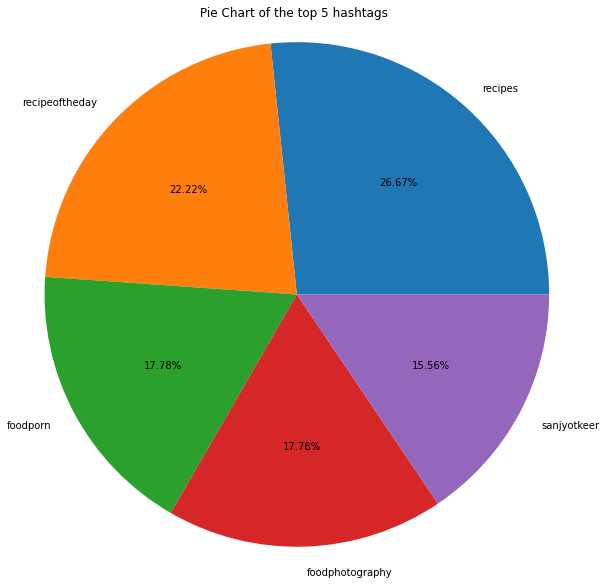

In [447]:
x=hash_word[:5]
y=frequency[:5]
plt.figure(figsize=(10, 10))
plt.pie(y, labels=x, autopct='%.2f%%')
plt.axis('equal')
plt.title('Pie Chart of the top 5 hashtags ')
plt.show()

# 3.1) Find out the likes of the top 10 posts of the 5 handles obtained earlier.

In [489]:
likes = {}
import time
for i in name_link_sorted:
    key = i
    value = []
    driver.get(name_link_sorted[i])
    posts_list = driver.find_elements_by_xpath('//div[@class="v1Nh3 kIKUG  _bz0w"]/a')
    for i in range(10):
        posts_list[i].click()
        time.sleep(2)
        try:
            l = driver.find_element_by_xpath('/html/body/div[5]/div[2]/div/article/div[3]/section[2]/div/span')
            l.click()
            time.sleep(2)
            li = driver.find_element_by_xpath('/html/body/div[5]/div[2]/div/article/div[3]/section[2]/div/div/div[4]/span')
            #print(li.get_attribute('innerHTML'))
            value.append(li.get_attribute('innerHTML'))
            time.sleep(2)
            lc = driver.find_element_by_xpath('/html/body/div[5]/div[2]/div/article/div[3]/section[2]/div/div/div[1]')
            lc.click()
        except NoSuchElementException:
            pass
        try:
            li = driver.find_element_by_xpath('/html/body/div[5]/div[2]/div/article/div[3]/section[2]/div/div/a/span')
            #print(li.get_attribute('innerHTML'))
            value.append(li.get_attribute('innerHTML'))
        except NoSuchElementException:
            pass
        #time.sleep()
        close_button = driver.find_element_by_xpath('/html/body/div[5]/div[3]/button')
        close_button.click()
        time.sleep(2)
    likes[key] = value
    driver.back()
    #close = driver.find_element_by_xpath('//div[contains(@class , "_2dDPU")]/div[3]/button')
    #close.click()
driver.get('https://www.instagram.com/')

In [500]:
likes_no_dict= {}
for i in likes:
    likes_str = [likes[i]]
    like_no = []
    for j in likes_str:
        for v in j:
            v = int("".join(v.split(',')))
            like_no.append(v)
    likes_no_dict[i] = like_no
        

In [504]:
for i in likes_no_dict:
    print("Insta handle----",i)
    print("No of likes of 10 latest posts",likes_no_dict[i])

Insta handle---- yourfoodlab
No of likes of 10 latest posts [10619, 22137, 25922, 31253, 49320, 37322, 48894, 30865, 25087, 39826]
Insta handle---- foodrush.recipe
No of likes of 10 latest posts [7010, 11807, 51693, 31587, 15488, 9337, 77262, 41766, 29083, 70115]
Insta handle---- food
No of likes of 10 latest posts [555, 785, 1337, 626, 905, 1281, 591, 1026, 717, 942]
Insta handle---- delhi_street_food1
No of likes of 10 latest posts [80, 715, 603, 2415, 825, 3231, 3567, 787, 4781, 1306]
Insta handle---- gorakhpurfoods
No of likes of 10 latest posts [481, 374, 524, 326, 387, 490, 312, 487, 364, 503]


# 3.2) Calculate the average likes for a handle.

In [512]:
avg_likes = []
for i in likes_no_dict:
    print("Insta handle----",i)
    l = 0 
    for j in likes_no_dict[i]:
        l = l + j
    l = l/10
    avg_likes.append(l)
    print("Average like ",l)
    

Insta handle---- yourfoodlab
Average like  32124.5
Insta handle---- foodrush.recipe
Average like  34514.8
Insta handle---- food
Average like  876.5
Insta handle---- delhi_street_food1
Average like  1831.0
Insta handle---- gorakhpurfoods
Average like  424.8


# 3.3) Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.

In [517]:
j = 0
for i in name_foll_no_sorted:
    print("Insta handle name--",i,", No of followers--",name_foll_no_sorted[i],", Average likes--",avg_likes[j])
    j = j+1

Insta handle name-- yourfoodlab , No of followers-- 1592114 , Average likes-- 32124.5
Insta handle name-- foodrush.recipe , No of followers-- 606125 , Average likes-- 34514.8
Insta handle name-- food , No of followers-- 113840 , Average likes-- 876.5
Insta handle name-- delhi_street_food1 , No of followers-- 22149 , Average likes-- 1831.0
Insta handle name-- gorakhpurfoods , No of followers-- 12688 , Average likes-- 424.8


In [520]:
j = 0
avg_ratio = []
for i in likes_no_dict:
    print("Insta handle---",i)
    avg_ratio.append(name_foll_no_sorted[i]/avg_likes[j])
    print("Average likes obtained by dividing average likes from the number of followers",name_foll_no_sorted[i]/avg_likes[j])
    j = j+1

Insta handle--- yourfoodlab
Average likes obtained by dividing average likes from the number of followers 49.56074024498436
Insta handle--- foodrush.recipe
Average likes obtained by dividing average likes from the number of followers 17.561307033504466
Insta handle--- food
Average likes obtained by dividing average likes from the number of followers 129.88020536223615
Insta handle--- delhi_street_food1
Average likes obtained by dividing average likes from the number of followers 12.096668487165484
Insta handle--- gorakhpurfoods
Average likes obtained by dividing average likes from the number of followers 29.868173258003765


# 3.4) Create a bar graph to depict the above obtained information.

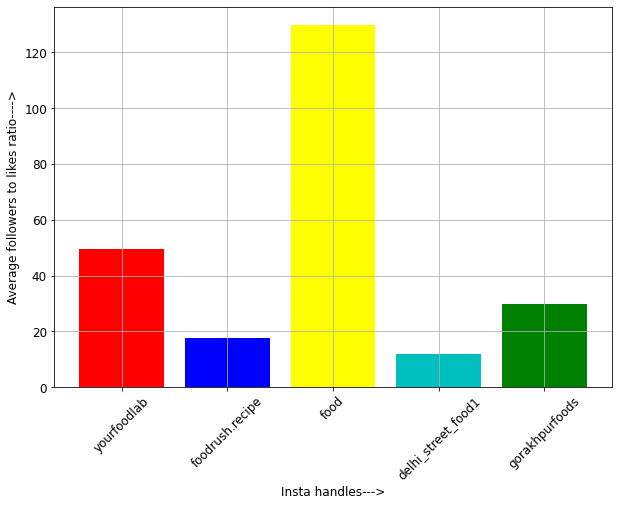

In [575]:
#plotting the graph between average followers to the likes ratio and users.
plt.figure(figsize=(10,7))
plt.bar(top5, avg_ratio, color=colors)
plt.xticks(rotation=45, size=12)
plt.xlabel('Insta handles--->', size=12)
plt.ylabel('Average followers to likes ratio---->', size=12)
plt.yticks(size=12)
plt.grid()
plt.show()